In [ ]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
ch=pd.read_csv('Churn_Modelling.csv')
ch

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
ch.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
inch=ch[['Gender','Age','Tenure','Balance','CreditScore','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [ ]:
inch['Gender']=inch['Gender'].map({'Female':0,'Male':1})

/tmp/ipython-input-5-1582706875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inch['Gender']=inch['Gender'].map({'Female':0,'Male':1})


In [ ]:
uni=inch[['Gender','Age','Tenure','Balance','CreditScore','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].apply(lambda x : x.unique())
uni

,0
Gender,"[0, 1]"
Age,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2..."
Tenure,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
Balance,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78..."
CreditScore,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ..."
NumOfProducts,"[1, 3, 2, 4]"
HasCrCard,"[1, 0]"
IsActiveMember,"[1, 0]"
EstimatedSalary,"[101348.88, 112542.58, 113931.57, 93826.63, 79..."


In [ ]:
type=inch[['Gender','Age','Tenure','Balance','CreditScore','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].apply(lambda x: x.dtype)
type

,0
Gender,int64
Age,int64
Tenure,int64
Balance,float64
CreditScore,int64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
inch.shape

(10000, 9)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
def create_model(x,y):
    x = x[:y.shape[0]]
    model = keras.Sequential([
        keras.layers.Dense(50,input_shape=(9,),activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(x,y,epochs=5)
    return model

In [ ]:
ouch=ch['Exited']

In [ ]:
ouch.shape

(10000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train ,Y_text= train_test_split(inch,ouch, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8000, 9)

In [ ]:
Y_train.shape

(8000,)

In [ ]:
model= model(X_train,Y_train)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6355 - loss: 1157.1140
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6949 - loss: 54.4291
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6931 - loss: 75.9662
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6836 - loss: 55.3858
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6840 - loss: 53.9967


In [ ]:
model.evaluate(X_test,Y_text)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6184 - loss: 66.6185


[66.86469268798828, 0.625]

In [ ]:
y_pred=model.predict(X_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.00324195],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [1.        ]], dtype=float32)

In [ ]:
Y_text.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [ ]:
print(classification_report(Y_text.tolist(),y_pred.tolist()))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74      1607
           1       0.23      0.40      0.30       393

    accuracy                           0.62      2000
   macro avg       0.53      0.54      0.52      2000
weighted avg       0.71      0.62      0.66      2000



UNDERSAMPLING

In [ ]:
ouch.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
new=pd.concat([inch,ouch],axis=1)
new

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,42,2,0.00,619,1,1,1,101348.88,1
1,0,41,1,83807.86,608,1,0,1,112542.58,0
2,0,42,8,159660.80,502,3,1,0,113931.57,1
3,0,39,1,0.00,699,2,0,0,93826.63,0
4,0,43,2,125510.82,850,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,1,39,5,0.00,771,2,1,0,96270.64,0
9996,1,35,10,57369.61,516,1,1,1,101699.77,0
9997,0,36,7,0.00,709,1,0,1,42085.58,1
9998,1,42,3,75075.31,772,2,1,0,92888.52,1


In [ ]:
new0=new[new['Exited']==0]
new0

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,0,41,1,83807.86,608,1,0,1,112542.58,0
3,0,39,1,0.00,699,2,0,0,93826.63,0
4,0,43,2,125510.82,850,1,1,1,79084.10,0
6,1,50,7,0.00,822,2,1,1,10062.80,0
8,1,44,4,142051.07,501,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...
9993,1,28,7,155060.41,644,1,1,0,29179.52,0
9994,0,29,2,0.00,800,2,0,0,167773.55,0
9995,1,39,5,0.00,771,2,1,0,96270.64,0
9996,1,35,10,57369.61,516,1,1,1,101699.77,0


In [ ]:
new1=new[new['Exited']==1]
new1

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,42,2,0.00,619,1,1,1,101348.88,1
2,0,42,8,159660.80,502,3,1,0,113931.57,1
5,1,44,8,113755.78,645,2,1,0,149756.71,1
7,0,29,4,115046.74,376,4,1,0,119346.88,1
16,1,58,1,132602.88,653,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...
9981,1,42,3,152039.70,498,1,1,1,53445.17,1
9982,0,46,7,137145.12,655,1,1,0,115146.40,1
9991,0,53,4,88381.21,597,1,1,0,69384.71,1
9997,0,36,7,0.00,709,1,0,1,42085.58,1


In [ ]:
new0=new0.sample(len(new1))
new0

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1864,1,45,7,123859.60,607,1,0,1,113051.57,0
7166,0,40,8,0.00,618,2,1,0,80204.38,0
1686,1,36,5,0.00,682,2,1,1,147758.51,0
7264,1,33,3,0.00,434,1,1,1,2739.71,0
6930,1,30,3,165257.20,751,1,0,0,134822.05,0
...,...,...,...,...,...,...,...,...,...,...
5598,0,57,7,116936.81,616,1,1,1,104379.36,0
1691,1,31,8,0.00,591,1,1,1,141677.33,0
9431,0,24,5,172231.93,523,1,0,1,155144.12,0
6740,0,40,2,147171.20,670,1,0,1,69850.04,0


In [ ]:
new=pd.concat([new0,new1],axis=0)
new

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1864,1,45,7,123859.60,607,1,0,1,113051.57,0
7166,0,40,8,0.00,618,2,1,0,80204.38,0
1686,1,36,5,0.00,682,2,1,1,147758.51,0
7264,1,33,3,0.00,434,1,1,1,2739.71,0
6930,1,30,3,165257.20,751,1,0,0,134822.05,0
...,...,...,...,...,...,...,...,...,...,...
9981,1,42,3,152039.70,498,1,1,1,53445.17,1
9982,0,46,7,137145.12,655,1,1,0,115146.40,1
9991,0,53,4,88381.21,597,1,1,0,69384.71,1
9997,0,36,7,0.00,709,1,0,1,42085.58,1


In [ ]:
inc=new.drop(columns=['Exited'])
inc

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1864,1,45,7,123859.60,607,1,0,1,113051.57
7166,0,40,8,0.00,618,2,1,0,80204.38
1686,1,36,5,0.00,682,2,1,1,147758.51
7264,1,33,3,0.00,434,1,1,1,2739.71
6930,1,30,3,165257.20,751,1,0,0,134822.05
...,...,...,...,...,...,...,...,...,...
9981,1,42,3,152039.70,498,1,1,1,53445.17
9982,0,46,7,137145.12,655,1,1,0,115146.40
9991,0,53,4,88381.21,597,1,1,0,69384.71
9997,0,36,7,0.00,709,1,0,1,42085.58


In [ ]:
out=new['Exited']
out

,Exited
1864,0
7166,0
1686,0
7264,0
6930,0
...,...
9981,1
9982,1
9991,1
9997,1


In [ ]:
trained_model = create_model(inc,out)

Epoch 1/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5010 - loss: 1680.6794
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4972 - loss: 120.0713
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5228 - loss: 61.3425
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5173 - loss: 63.8223
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5364 - loss: 44.9145


In [ ]:
pred=model.predict(inc)
pred=(pred>0.5)
pred

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
print(classification_report(out,pred))

              precision    recall  f1-score   support

           0       0.53      0.68      0.60      2037
           1       0.56      0.40      0.47      2037

    accuracy                           0.54      4074
   macro avg       0.55      0.54      0.53      4074
weighted avg       0.55      0.54      0.53      4074



**OVERSAMPLING**

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
new=pd.concat([inch,ouch],axis=1)
new

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,42,2,0.00,619,1,1,1,101348.88,1
1,0,41,1,83807.86,608,1,0,1,112542.58,0
2,0,42,8,159660.80,502,3,1,0,113931.57,1
3,0,39,1,0.00,699,2,0,0,93826.63,0
4,0,43,2,125510.82,850,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,1,39,5,0.00,771,2,1,0,96270.64,0
9996,1,35,10,57369.61,516,1,1,1,101699.77,0
9997,0,36,7,0.00,709,1,0,1,42085.58,1
9998,1,42,3,75075.31,772,2,1,0,92888.52,1


In [ ]:
new0=new[new['Exited']==0]
new0.shape

(7963, 10)

In [ ]:
new1=new[new['Exited']==1]
new1.shape

(2037, 10)

In [ ]:
new1=new1.sample(7963,replace=True)
new1.shape

(7963, 10)

In [ ]:
ne=pd.concat([new0,new1],axis=0)
ne

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,0,41,1,83807.86,608,1,0,1,112542.58,0
3,0,39,1,0.00,699,2,0,0,93826.63,0
4,0,43,2,125510.82,850,1,1,1,79084.10,0
6,1,50,7,0.00,822,2,1,1,10062.80,0
8,1,44,4,142051.07,501,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...
3268,1,54,5,0.00,690,1,1,0,12847.61,1
2372,0,43,1,125537.38,737,1,1,0,138510.01,1
9613,1,33,1,0.00,635,3,0,0,178067.33,1
4667,1,54,3,144768.94,749,1,1,0,93336.30,1


In [ ]:
inc = ne.drop(columns=['Exited'])
inc

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,0,41,1,83807.86,608,1,0,1,112542.58
3,0,39,1,0.00,699,2,0,0,93826.63
4,0,43,2,125510.82,850,1,1,1,79084.10
6,1,50,7,0.00,822,2,1,1,10062.80
8,1,44,4,142051.07,501,2,0,1,74940.50
...,...,...,...,...,...,...,...,...,...
3268,1,54,5,0.00,690,1,1,0,12847.61
2372,0,43,1,125537.38,737,1,1,0,138510.01
9613,1,33,1,0.00,635,3,0,0,178067.33
4667,1,54,3,144768.94,749,1,1,0,93336.30


In [ ]:
ouc=ne['Exited']
ouc

,Exited
1,0
3,0
4,0
6,0
8,0
...,...
3268,1
2372,1
9613,1
4667,1


In [ ]:
model= create_model(inc,ouc)


Epoch 1/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5111 - loss: 1512.9082
Epoch 2/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5065 - loss: 77.4962
Epoch 3/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5169 - loss: 67.6444
Epoch 4/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5200 - loss: 83.6416
Epoch 5/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5284 - loss: 58.0207


In [ ]:
pred=model.predict(inc)
pred=(pred>0.5).astype(int)
pred

498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
print(classification_report(ouc,pred))

              precision    recall  f1-score   support

           0       0.52      0.93      0.66      7963
           1       0.65      0.12      0.20      7963

    accuracy                           0.53     15926
   macro avg       0.58      0.53      0.43     15926
weighted avg       0.58      0.53      0.43     15926



**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

In [ ]:
new=pd.concat([inch,ouch],axis=1)
new

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,42,2,0.00,619,1,1,1,101348.88,1
1,0,41,1,83807.86,608,1,0,1,112542.58,0
2,0,42,8,159660.80,502,3,1,0,113931.57,1
3,0,39,1,0.00,699,2,0,0,93826.63,0
4,0,43,2,125510.82,850,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,1,39,5,0.00,771,2,1,0,96270.64,0
9996,1,35,10,57369.61,516,1,1,1,101699.77,0
9997,0,36,7,0.00,709,1,0,1,42085.58,1
9998,1,42,3,75075.31,772,2,1,0,92888.52,1


In [ ]:
X_resampled, y_resampled = smote.fit_resample(new.drop(columns=['Exited']),new['Exited'])

In [ ]:
X_resampled

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,42,2,0.000000,619,1,1,1,101348.880000
1,0,41,1,83807.860000,608,1,0,1,112542.580000
2,0,42,8,159660.800000,502,3,1,0,113931.570000
3,0,39,1,0.000000,699,2,0,0,93826.630000
4,0,43,2,125510.820000,850,1,1,1,79084.100000
...,...,...,...,...,...,...,...,...,...
15921,0,44,5,0.000000,609,1,0,0,191645.409649
15922,0,50,4,111805.421217,695,1,1,0,20849.339832
15923,0,40,5,119563.576326,464,1,1,0,91608.808290
15924,0,37,1,122901.270213,601,1,0,0,103159.638064


In [ ]:
y_resampled

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
15921,1
15922,1
15923,1
15924,1


In [ ]:
model=create_model(X_resampled,y_resampled)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5026 - loss: 1445.5668
Epoch 2/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5164 - loss: 65.2756
Epoch 3/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5272 - loss: 60.1531
Epoch 4/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5286 - loss: 61.0506
Epoch 5/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5307 - loss: 47.0831


In [ ]:
pred=model.predict(X_resampled)
pred=(pred>0.5).astype(int)
pred

498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
print(classification_report(y_resampled,pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7963
           1       0.66      0.00      0.01      7963

    accuracy                           0.50     15926
   macro avg       0.58      0.50      0.34     15926
weighted avg       0.58      0.50      0.34     15926



In [ ]:
model.compile(optimizer='adam',loss='sparse',metrics=['accuracy'])

In [1]:
from tensorflow import keras
import cv2
import PIL
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [2]:
url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
path = keras.utils.get_file('flower_photos', origin=url,cache_dir='.' ,untar=True)
path

'./datasets/flower_photos'

In [3]:
dir1=pathlib.Path(path)
dir1

PosixPath('datasets/flower_photos')

In [4]:
l=list(dir1.glob('**/*.jpg'))

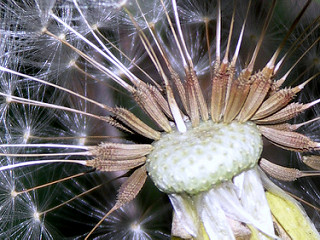

In [5]:
PIL.Image.open(str(l[1]))

In [6]:
flower_dict={
    'daisy':list(dir1.glob('*/daisy/*')),
    'dandelion':list(dir1.glob('*/dandelion/*')),
    'roses':list(dir1.glob('*/roses/*')),
    'sunflowers':list(dir1.glob('*/sunflowers/*')),
    'tulips':list(dir1.glob('*/tulips/*'))
}

In [7]:
flower_label={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [8]:
x,y=[],[]
for name ,flower in flower_dict.items():
    for image in flower:
        im=cv2.imread(str(image))
        im=cv2.resize(im,(224,224)) # Resize images to 224x224
        x.append(im)
        y.append(flower_label[name])

In [9]:
x=np.array(x)
y=np.array(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_text = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(64,input_shape=(180,180,3),kernel_size=(3,3),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(5, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.3333 - loss: 2.2572
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5904 - loss: 1.0360
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7210 - loss: 0.7602
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8558 - loss: 0.4140
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9359 - loss: 0.2058
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9751 - loss: 0.1079
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9773 - loss: 0.0743
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9987 - loss: 0.0213
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9967 - loss: 0.0170
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9970 - loss: 0.0106


In [ ]:
model.evaluate(X_train,Y_train)

92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9918 - loss: 0.0379


[0.035251278430223465, 0.9914849996566772]

In [ ]:
import tensorflow as tf
arguments = keras.Sequential([
    tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    tf.keras.layers.RandomRotation(factor=0.1),
    tf.keras.layers.RandomContrast(factor=0.1)
])

In [ ]:
model = keras.Sequential([
    arguments,
    keras.layers.Conv2D(64,3,padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, 3,padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, 3,padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='softmax')

])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.7900 - loss: 0.5465
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.7885 - loss: 0.5428
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8019 - loss: 0.5154
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8068 - loss: 0.5055
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8164 - loss: 0.4768
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8027 - loss: 0.5000
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8094 - loss: 0.4771
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8344 - loss: 0.4386
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.8303 - loss: 0.4419
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.8333 - loss: 0.4376
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8455 - loss: 0.4194
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - a

In [ ]:
model.evaluate(X_test,Y_text)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7816 - loss: 0.9517


[0.9733195900917053, 0.7711171507835388]

In [ ]:
pred=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [ ]:
Y_text[:50]

array([0, 3, 4, 1, 1, 3, 3, 0, 1, 0, 0, 2, 1, 0, 0, 4, 0, 0, 1, 0, 4, 4,
       0, 0, 0, 2, 2, 4, 3, 3, 3, 2, 0, 4, 2, 1, 4, 3, 0, 0, 4, 0, 2, 3,
       1, 1, 4, 1, 3, 2])

In [ ]:
pred=[np.argmax(x) for x in pred]

In [ ]:
pred[:50]

[np.int64(4),
 np.int64(3),
 np.int64(4),
 np.int64(0),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(0),
 np.int64(2),
 np.int64(4),
 np.int64(0),
 np.int64(4),
 np.int64(0),
 np.int64(3),
 np.int64(4),
 np.int64(4),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(4),
 np.int64(2),
 np.int64(1),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(4),
 np.int64(1),
 np.int64(3),
 np.int64(2)]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_text,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.85      0.77      0.80       166
           2       0.64      0.69      0.66       132
           3       0.86      0.87      0.86       129
           4       0.69      0.71      0.70       157

    accuracy                           0.77       734
   macro avg       0.77      0.77      0.77       734
weighted avg       0.78      0.77      0.77       734



Text(95.72222222222221, 0.5, 'Truth')

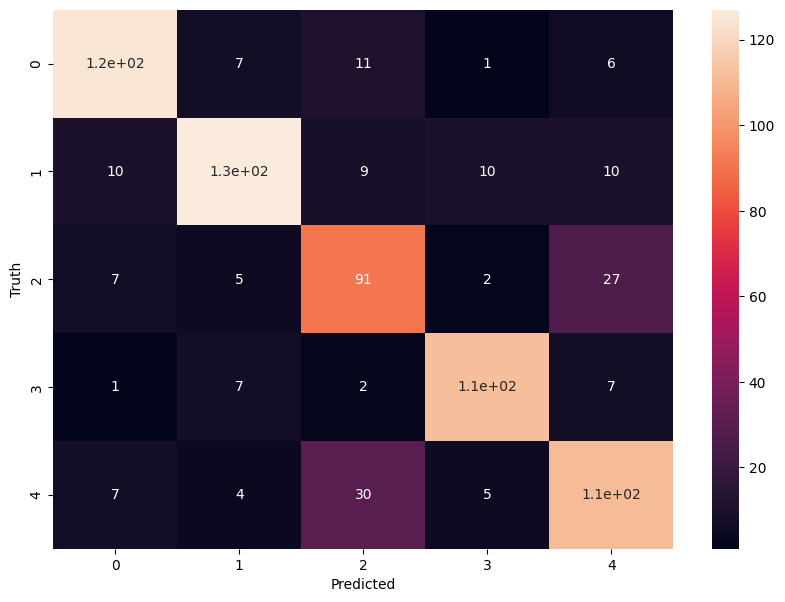

In [ ]:
import seaborn as sns
cm=confusion_matrix(Y_text,pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
np.argmax(model.predict(X_test[0:1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


np.int64(4)

In [ ]:
predicted_class_index = np.argmax(model.predict(X_test[5:6]))
class_names = list(flower_label.keys())
print(class_names[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
sunflowers


Text(0.5, 1.0, 'sunflowers')

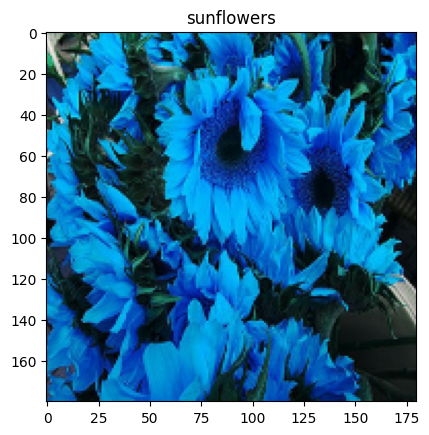

In [ ]:
plt.gray()
plt.imshow(X_test[5])
plt.title(class_names[Y_text[5]])

**Transfer Learning is here**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import PIL.Image as Image
import tensorflow_hub as hub

In [6]:
premodel=keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [12]:
url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
path = keras.utils.get_file('flower_photos', origin=url,cache_dir='.' ,untar=True)
path

'./datasets/flower_photos'

In [13]:
import pathlib
dir=pathlib.Path(path)

In [14]:
daisy=list(pathlib.Path(path).glob('*/daisy/*'))
daisy

[PosixPath('datasets/flower_photos/flower_photos/daisy/18442919723_d1251d3e14_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3711723108_65247a3170.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8383753520_8391dd80ee_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/175106495_53ebdef092_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3975010332_3209f9f447_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/14350958832_29bdd3a254.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8063844363_db3f4dea85.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/14674743211_f68b13f6d9.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2454280135_ac3aa75cdc_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2649404904_b7a91991bb_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/4669117051_ce61e91b76.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/1102327

In [16]:
x=[]
for image in daisy:
    im=cv2.imread(str(image))
    im=cv2.resize(im,(224,224))
    x.append(im)
x=np.array(x)
x.shape

(633, 224, 224, 3)

In [18]:
pre=premodel.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [19]:
# Define the full model with the pre-trained layer and a classification layer
full_model = keras.Sequential([
    model, # Use the pre-trained model (which is the KerasLayer)
    keras.layers.Dense(len(flower_label), activation='softmax') # Add a classification layer
])

# Compile the full model
full_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [20]:
pre

[np.int64(2631),
 np.int64(1370),
 np.int64(54),
 np.int64(1519),
 np.int64(1370),
 np.int64(1661),
 np.int64(3369),
 np.int64(54),
 np.int64(1351),
 np.int64(90),
 np.int64(1370),
 np.int64(1294),
 np.int64(1289),
 np.int64(1294),
 np.int64(1294),
 np.int64(5191),
 np.int64(462),
 np.int64(1294),
 np.int64(147),
 np.int64(1370),
 np.int64(1370),
 np.int64(90),
 np.int64(568),
 np.int64(90),
 np.int64(99),
 np.int64(2650),
 np.int64(54),
 np.int64(1802),
 np.int64(1370),
 np.int64(1002),
 np.int64(1334),
 np.int64(2282),
 np.int64(90),
 np.int64(1334),
 np.int64(3894),
 np.int64(1294),
 np.int64(1351),
 np.int64(1351),
 np.int64(54),
 np.int64(90),
 np.int64(1867),
 np.int64(90),
 np.int64(1334),
 np.int64(1370),
 np.int64(6427),
 np.int64(1334),
 np.int64(90),
 np.int64(3877),
 np.int64(1370),
 np.int64(1294),
 np.int64(1818),
 np.int64(1370),
 np.int64(1289),
 np.int64(5642),
 np.int64(1294),
 np.int64(54),
 np.int64(1294),
 np.int64(1848),
 np.int64(381),
 np.int64(2650),
 np.int64(

TypeError: Invalid shape (1, 224, 224, 3) for image data

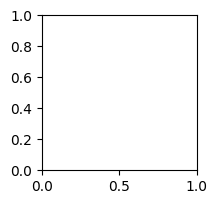

In [23]:
plt.matshow(x[0:1])

In [28]:
pm=hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",input_shape=(180,180,3),trainable=False)

In [32]:
import sys, importlib
import tensorflow as tf
import tensorflow_hub as hub

print("Python         :", sys.version.split()[0])
print("TensorFlow     :", tf.__version__)
print("Hub            :", hub.__version__)

# Is a standalone “keras” also imported?
if "keras" in sys.modules and sys.modules["keras"] is not tf.keras:
    print("⚠️  Stand-alone keras loaded:", sys.modules["keras"].__version__)
else:
    print("keras module   : using tf.keras (good)")

# Build the hub layer exactly like before
pretrained_model_without_top_layer = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/5",
    trainable=False,
    input_shape=(224, 224, 3)
)
print("Hub layer type :", type(pretrained_model_without_top_layer))

# Try building Sequential
try:
    model = tf.keras.Sequential([
        pretrained_model_without_top_layer,
        tf.keras.layers.Dense(5, activation="softmax")
    ])
    print("✅ Sequential constructed with", len(model.layers), "layers.")
except Exception as e:
    print("❌ Still failing:", e.__class__.__name__, "-", e)


Python         : 3.11.13
TensorFlow     : 2.18.0
Hub            : 0.16.1
⚠️  Stand-alone keras loaded: 3.8.0
Hub layer type : <class 'tensorflow_hub.keras_layer.KerasLayer'>
❌ Still failing: ValueError - Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7a112bb0a9d0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)
